In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os


In [4]:
df = pd.read_csv("fifa_data2.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
#df.columns

In [6]:
df.dtypes.count()

89

In [7]:
#df['Nationality'].value_counts()

In [8]:
#df.nunique()

In [9]:
#df.describe()

In [10]:
df=df[['ID','Name','Age','Nationality','Overall','Potential','Preferred Foot','International Reputation','Skill Moves','Jersey Number',]]

In [11]:
df.sample()

,ID,Name,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Skill Moves,Jersey Number
7253,237469,Nouhou,21,Cameroon,68,77,Left,1.0,3.0,14.0


(array([1.063e+03, 3.687e+03, 4.030e+03, 3.868e+03, 2.977e+03, 1.689e+03,
        7.270e+02, 1.440e+02, 1.900e+01, 3.000e+00]),
 array([16. , 18.9, 21.8, 24.7, 27.6, 30.5, 33.4, 36.3, 39.2, 42.1, 45. ]),
 <a list of 10 Patch objects>)

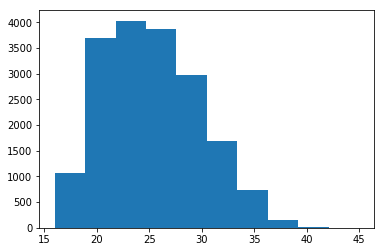

In [12]:
plt.hist(df.Age)

In [13]:
df.Age.value_counts()


21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
29     959
30     917
18     732
31     707
32     574
33     408
34     404
17     289
35     196
36     127
37      82
16      42
38      37
39      25
40      13
41       5
44       2
42       1
45       1
Name: Age, dtype: int64

In [14]:
df = df[df.Age<=40]

In [15]:
df.Age.max()

40

(array([1063., 2264., 4095., 2677., 2549., 2977., 1281., 1008.,  209.,
          75.]),
 array([16. , 18.4, 20.8, 23.2, 25.6, 28. , 30.4, 32.8, 35.2, 37.6, 40. ]),
 <a list of 10 Patch objects>)

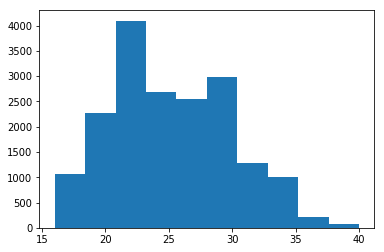

In [16]:
plt.hist(df.Age)

In [17]:
df.describe()

,ID,Age,Overall,Potential,International Reputation,Skill Moves,Jersey Number
count,18198.000000,18198.000000,18198.000000,18198.000000,18150.000000,18150.000000,18138.000000
mean,214353.967524,25.113749,66.239862,71.310968,1.113058,2.361763,19.546091
std,29830.863145,4.655456,6.907709,6.132717,0.393904,0.755849,15.947625
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000
25%,200353.750000,21.000000,62.000000,67.000000,1.000000,2.000000,8.000000
50%,221767.500000,25.000000,66.000000,71.000000,1.000000,2.000000,17.000000
75%,236532.750000,28.000000,71.000000,75.000000,1.000000,3.000000,26.000000
max,246620.000000,40.000000,94.000000,95.000000,5.000000,5.000000,99.000000


In [18]:
#df.groupby('Age')['Overall'].agg(np.mean)

In [19]:
df['total_score'] = (df.Overall/20 + df.Potential/20 + df['International Reputation'] + df['Skill Moves'])*5

In [20]:
best = df.groupby('Age')['total_score'].agg(np.max).reset_index()
best.head(10)

,Age,total_score
0,16,57.50
1,17,72.25
2,18,71.50
3,19,85.75
4,20,72.50
5,21,78.75
6,22,79.25
7,23,82.25
8,24,83.25
9,25,89.50


In [21]:
age_scores = list(zip(best.Age,best.total_score))
#Converts columns into iterables and combines them into list
#age_scores


In [22]:
best_players = pd.DataFrame(columns=df.columns)
#best_players

In [23]:
#Enumerates adds a counter to an iterable
for index,i in enumerate(age_scores):
    best_players = best_players.append(df[(df.Age == i[0] ) & (df.total_score == i[1])],ignore_index=True )

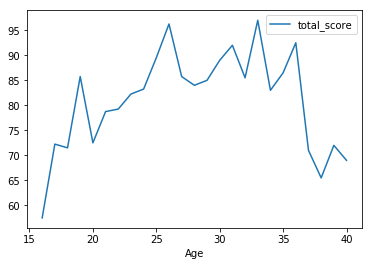

In [24]:
best_players.plot('Age', 'total_score')

In [25]:
best_players[['Name','Age','Nationality','total_score','Overall']]

,Name,Age,Nationality,total_score,Overall
0,W. Geubbels,16,France,57.50,64
1,Vinícius Júnior,17,Brazil,72.25,77
2,J. Sancho,18,England,71.50,77
3,K. Mbappé,19,France,85.75,88
4,M. Rashford,20,England,72.50,81
5,O. Dembélé,21,France,78.75,83
6,Marco Asensio,22,Spain,79.25,85
7,Gelson Martins,23,Portugal,82.25,82
8,M. Depay,24,Netherlands,83.25,84
9,P. Pogba,25,France,89.50,87


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

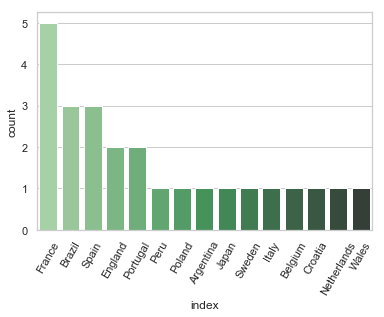

In [164]:
df = best_players.Nationality.value_counts().reset_index(name='count')
sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_d", len(df))

sn.barplot(x="index", y="count", data=df,palette=np.array(pal[::-1]))
plt.xticks(rotation=60)

Best players based on Nationality

In [27]:
df.groupby('Nationality')['total_score'].agg(np.max).reset_index()
df.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Skill Moves,Jersey Number,total_score
0,158023,L. Messi,31,Argentina,94,94,Left,5.0,4.0,10.0,92.00
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Right,5.0,5.0,7.0,97.00
2,190871,Neymar Jr,26,Brazil,92,93,Right,5.0,5.0,10.0,96.25
3,193080,De Gea,27,Spain,91,93,Right,4.0,1.0,1.0,71.00
4,192985,K. De Bruyne,27,Belgium,91,92,Right,4.0,4.0,7.0,85.75
5,183277,E. Hazard,27,Belgium,91,91,Right,4.0,4.0,10.0,85.50
6,177003,L. Modrić,32,Croatia,91,91,Right,4.0,4.0,10.0,85.50
7,176580,L. Suárez,31,Uruguay,91,91,Right,5.0,3.0,9.0,85.50
8,155862,Sergio Ramos,32,Spain,91,91,Right,4.0,3.0,15.0,80.50
9,200389,J. Oblak,25,Slovenia,90,93,Right,3.0,1.0,1.0,65.75


In [28]:
df['Nationality'].nunique()

164

In [129]:
best_players.sort_values(by='total_score')[::-1][:20]

,ID,Name,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Skill Moves,Jersey Number,total_score
17,20801,Cristiano Ronaldo,33,Portugal,94,94,Right,5.0,5.0,7.0,97.00
10,190871,Neymar Jr,26,Brazil,92,93,Right,5.0,5.0,10.0,96.25
20,41236,Z. Ibrahimović,36,Sweden,85,85,Right,5.0,5.0,9.0,92.50
15,158023,L. Messi,31,Argentina,94,94,Left,5.0,4.0,10.0,92.00
9,195864,P. Pogba,25,France,87,91,Right,4.0,5.0,6.0,89.50
14,176676,Marcelo,30,Brazil,88,88,Left,4.0,5.0,12.0,89.00
19,156616,F. Ribéry,35,France,83,83,Right,4.0,5.0,7.0,86.50
3,231747,K. Mbappé,19,France,88,95,Right,3.0,5.0,10.0,85.75
11,192985,K. De Bruyne,27,Belgium,91,92,Right,4.0,4.0,7.0,85.75
16,177003,L. Modrić,32,Croatia,91,91,Right,4.0,4.0,10.0,85.50


In [130]:
best_players[['Name','Age','Nationality','total_score','Overall']]

,Name,Age,Nationality,total_score,Overall
0,W. Geubbels,16,France,57.50,64
1,Vinícius Júnior,17,Brazil,72.25,77
2,J. Sancho,18,England,71.50,77
3,K. Mbappé,19,France,85.75,88
4,M. Rashford,20,England,72.50,81
5,O. Dembélé,21,France,78.75,83
6,Marco Asensio,22,Spain,79.25,85
7,Gelson Martins,23,Portugal,82.25,82
8,M. Depay,24,Netherlands,83.25,84
9,P. Pogba,25,France,89.50,87
